In [1]:
import json
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

In [2]:
#This code is only for reproducing paper results from existing json file currently
file_path = f'../data/paper_data/EpsStep_finetuning_Linf.json'

with open(file_path, 'r') as f:
    data = json.load(f)

eps_step_list = data['eps_iter_list']
runtime_list = data['runtime_list']
mean_adv_dist_list = data['adv_dist_list']

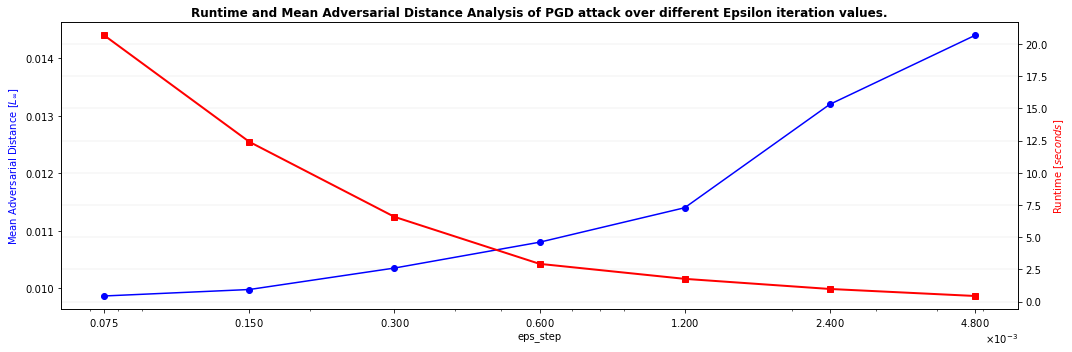

In [3]:
fig, ax1 = plt.subplots(figsize=(15, 5))

# Plot Runtime vs Mean Adversarial Distance with y-axis on the left
color = 'blue'
ax1.set_xlabel('eps_step')
ax1.set_ylabel('Mean Adversarial Distance [$L_{\infty}$]', color=color)
ax1.plot(eps_step_list, mean_adv_dist_list, 'o-', color=color)
ax1.tick_params(axis='both')
ax1.set_xscale('log')
ax1.set_xticks(eps_step_list)
ax1.set_xticklabels([f'{x:.5f}' if x < 0.001 else f'{x:g}' for x in eps_step_list])

# Create a twin y-axis sharing the same x-axis for Adversarial Accuracy
ax2 = ax1.twinx()
color = 'red'
ax2.set_ylabel('Runtime [$seconds$]', color=color)
ax2.plot(eps_step_list, runtime_list, 's-', color=color, linewidth=2)
ax2.tick_params(axis='both')
ax2.grid(True, which='major', linestyle='-', color='gray', linewidth=0.1)
ax2.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax2.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
# 
# Add a title to the plot
plt.title('Runtime and Mean Adversarial Distance Analysis of PGD attack over different Epsilon iteration values.', weight='bold')

# Use tight layout to fit the subplots to the figure area.
plt.tight_layout()
plt.show()